### The file used for Activity Recognition using Weizman Dataset

# Human Activity Recognition

## Obtain the input files

In [25]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data2', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=30, random_state=10)

valid_files = train_files[90:]
valid_targets = train_targets[90:]

train_files = train_files[:90]
train_targets = train_targets[:90]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 154)
('\nNumber of videos in training data:', 90)
('Number of videos in validation data:', 34)
('Number of videos in test data:', 30)


### Description of the class labels

In [26]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(9), raw_data['target_names']):
    print(label)


The categorical labels are converted into integers.
Following is the mapping - 

(0, 'bend')
(1, 'jump')
(2, 'pjump')
(3, 'run')
(4, 'side')
(5, 'skip')
(6, 'walk')
(7, 'wave1')
(8, 'wave2')


### Each video file is associated with its class label

In [27]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data2/bend/denis_bend (copy).avi', 0)
('/home/geet/project/implementation/CNN/Data2/walk/moshe_walk (copy).avi', 6)
('/home/geet/project/implementation/CNN/Data2/side/moshe_side.avi', 4)
('/home/geet/project/implementation/CNN/Data2/walk/shahar_walk.avi', 6)
('/home/geet/project/implementation/CNN/Data2/walk/ido_walk.avi', 6)


('\nShape of the sample data:', (85, 144, 180, 3))


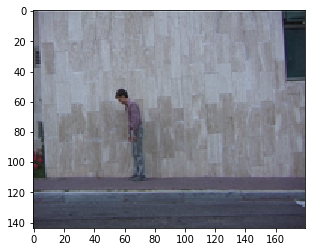

In [28]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[10])

In [29]:
sec=2
frames_needed=20

In [30]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path):

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [31]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video(path):
        

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [32]:
def read_videos(paths):
        
        list_of_videos = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [33]:
def read_videos_bgsub(paths):
        
        list_of_videos = []
        list_of_videos = [
            read_video_bgsub(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [34]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=9)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 90/90 [00:19<00:00,  4.50it/s]


('Shape of training data:', (90, 20, 20, 20, 1))
('Shape of training labels:', (90, 9))


In [35]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)

y_valid = to_categorical(valid_targets, num_classes=9)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

('Shape of validation data:', (34, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))


In [36]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=9)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 30/30 [00:06<00:00,  4.39it/s]

('Shape of testing data:', (30, 20, 20, 20, 1))
('Shape of testing labels:', (30, 9))


In [37]:
X_train_bgsub = read_videos_bgsub(train_files)
y_train_bgsub = to_categorical(train_targets, num_classes=9)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 90/90 [00:26<00:00,  3.39it/s]

('Shape of training data:', (90, 20, 20, 20, 1))
('Shape of training labels:', (90, 9))


In [38]:
X_test_bgsub = read_videos_bgsub(test_files)
y_test_bgsub = to_categorical(test_targets, num_classes=9)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 30/30 [00:09<00:00,  3.28it/s]

('Shape of testing data:', (30, 20, 20, 20, 1))
('Shape of testing labels:', (30, 9))


In [39]:
X_valid_bgsub = read_videos_bgsub(valid_files)
y_valid_bgsub = to_categorical(valid_targets, num_classes=9)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 34/34 [00:10<00:00,  3.31it/s]

('Shape of validation data:', (34, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))


('Class of 1st video:', 0)


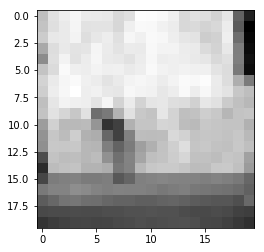

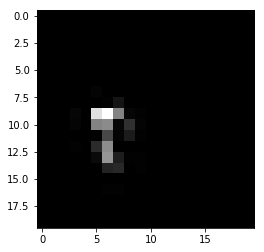

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

# Model 1 without BG Subtraction

In [41]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(9, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 4, 18, 18, 16)     1456      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 4, 9, 9, 16)       0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 4, 9, 9, 64)       46144     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 4, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_3 ( (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 297       
Total para

### Training Model - 1

In [42]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='W_Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=80, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 90 samples, validate on 34 samples
Epoch 1/80
 - 19s - loss: 2.2154 - acc: 0.1333 - val_loss: 2.2092 - val_acc: 0.0294

Epoch 00001: val_loss improved from inf to 2.20924, saving model to W_Model_1.weights.best.hdf5
Epoch 2/80
 - 18s - loss: 2.1910 - acc: 0.1333 - val_loss: 2.2124 - val_acc: 0.0294

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 18s - loss: 2.1895 - acc: 0.1667 - val_loss: 2.2168 - val_acc: 0.1176

Epoch 00003: val_loss did not improve
Epoch 4/80
 - 18s - loss: 2.1835 - acc: 0.1444 - val_loss: 2.2306 - val_acc: 0.1176

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 18s - loss: 2.1784 - acc: 0.1556 - val_loss: 2.2268 - val_acc: 0.1471

Epoch 00005: val_loss did not improve
Epoch 6/80
 - 19s - loss: 2.1791 - acc: 0.2222 - val_loss: 2.2273 - val_acc: 0.1471

Epoch 00006: val_loss did not improve
Epoch 7/80
 - 19s - loss: 2.1699 - acc: 0.2222 - val_loss: 2.2143 - val_acc: 0.1471

Epoch 00007: val_loss did not improve
Epoch 8/80
 - 18s - loss: 2.1698 - ac

 - 16s - loss: 1.3737 - acc: 0.3889 - val_loss: 1.4777 - val_acc: 0.2941

Epoch 00053: val_loss did not improve
Epoch 54/80
 - 16s - loss: 1.3697 - acc: 0.4111 - val_loss: 1.4716 - val_acc: 0.1765

Epoch 00054: val_loss did not improve
Epoch 55/80
 - 16s - loss: 1.3486 - acc: 0.4222 - val_loss: 1.4589 - val_acc: 0.2941

Epoch 00055: val_loss did not improve
Epoch 56/80
 - 16s - loss: 1.4168 - acc: 0.3333 - val_loss: 1.4861 - val_acc: 0.2647

Epoch 00056: val_loss did not improve
Epoch 57/80
 - 16s - loss: 1.4044 - acc: 0.3667 - val_loss: 1.4318 - val_acc: 0.2647

Epoch 00057: val_loss did not improve
Epoch 58/80
 - 16s - loss: 1.3860 - acc: 0.4444 - val_loss: 1.4902 - val_acc: 0.2941

Epoch 00058: val_loss did not improve
Epoch 59/80
 - 16s - loss: 1.3448 - acc: 0.4222 - val_loss: 1.4773 - val_acc: 0.2647

Epoch 00059: val_loss did not improve
Epoch 60/80
 - 16s - loss: 1.3485 - acc: 0.4000 - val_loss: 1.3858 - val_acc: 0.3824

Epoch 00060: val_loss improved from 1.41949 to 1.38580, sa

### Evaluating Model - 1

In [43]:
# Loading the model that performed the best on the validation set
model1.load_weights('W_Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 26.67%


## Model - 1 Performance



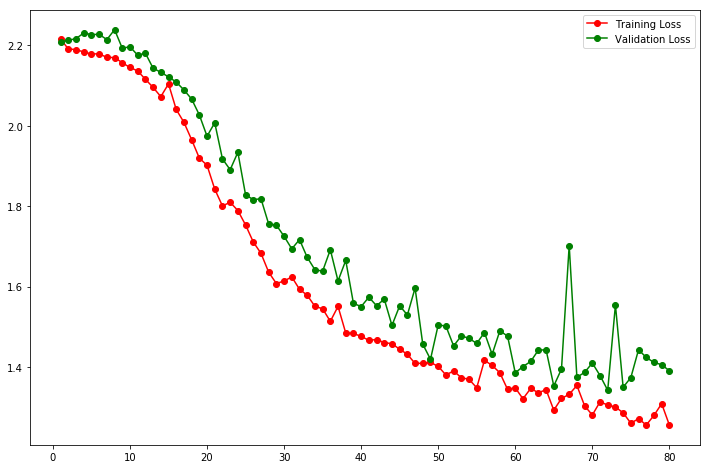

In [44]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,81)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.legend()

In [45]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


Normalized confusion matrix


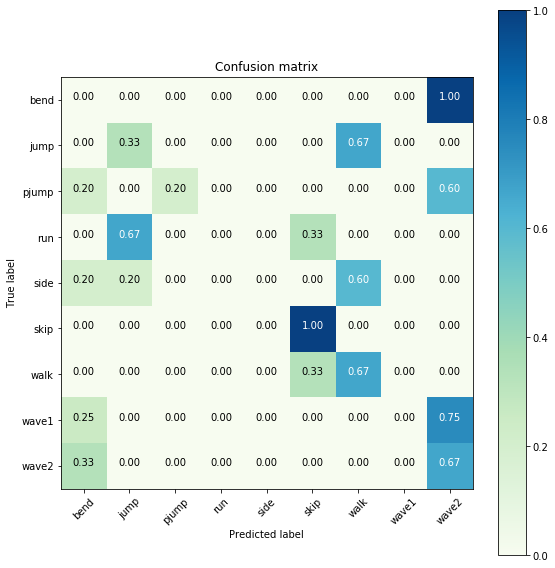

In [46]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


# Model 1, With BG Subtraction

In [47]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(9, activation='softmax'))

model1_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_7 (Conv3D)            (None, 4, 18, 18, 16)     1456      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 4, 9, 9, 16)       0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 4, 9, 9, 64)       46144     
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 4, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_4 ( (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 297       
Total para

In [48]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='W_Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 90 samples, validate on 34 samples
Epoch 1/80
90/90 [==============================] - 20s 217ms/step - loss: 2.1959 - acc: 0.2000 - val_loss: 2.1820 - val_acc: 0.2353

Epoch 00001: val_loss improved from inf to 2.18203, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 2/80
90/90 [==============================] - 19s 208ms/step - loss: 2.1762 - acc: 0.2667 - val_loss: 2.1651 - val_acc: 0.2353

Epoch 00002: val_loss improved from 2.18203 to 2.16513, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 3/80
90/90 [==============================] - 19s 206ms/step - loss: 2.1527 - acc: 0.2667 - val_loss: 2.1412 - val_acc: 0.2353

Epoch 00003: val_loss improved from 2.16513 to 2.14121, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 4/80
90/90 [==============================] - 18s 203ms/step - loss: 2.1120 - acc: 0.2667 - val_loss: 2.0999 - val_acc: 0.2647

Epoch 00004: val_loss improved from 2.14121 to 2.09995, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 5/80
9

90/90 [==============================] - 18s 204ms/step - loss: 0.8089 - acc: 0.6889 - val_loss: 0.9377 - val_acc: 0.5588

Epoch 00038: val_loss did not improve
Epoch 39/80
90/90 [==============================] - 18s 201ms/step - loss: 0.7909 - acc: 0.7000 - val_loss: 0.9177 - val_acc: 0.5294

Epoch 00039: val_loss improved from 0.93131 to 0.91768, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 40/80
90/90 [==============================] - 18s 203ms/step - loss: 0.7927 - acc: 0.6778 - val_loss: 0.8841 - val_acc: 0.5294

Epoch 00040: val_loss improved from 0.91768 to 0.88413, saving model to W_Model_1_bg.weights.best.hdf5
Epoch 41/80
90/90 [==============================] - 18s 203ms/step - loss: 0.7775 - acc: 0.6889 - val_loss: 0.9603 - val_acc: 0.4706

Epoch 00041: val_loss did not improve
Epoch 42/80
90/90 [==============================] - 19s 207ms/step - loss: 0.7561 - acc: 0.6889 - val_loss: 0.8620 - val_acc: 0.5588

Epoch 00042: val_loss improved from 0.88413 to 0.86201,

In [49]:
model1_bg.load_weights('W_Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 83.33%


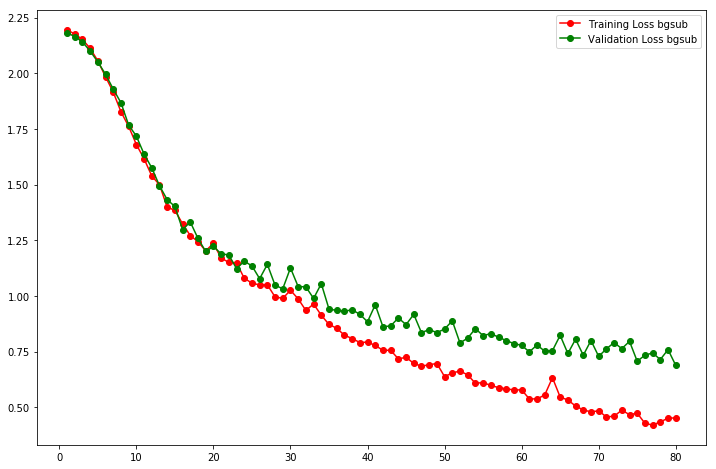

In [50]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,81)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.legend()

[5 3 6 3 4 6 6 0 7 7 8 2 8 3 0 2 6 7 2 4 1 1 4 4 2 2 3 6 8 7]
[5 3 4 5 4 6 6 0 2 7 8 2 8 3 0 2 1 7 2 4 1 1 4 4 7 2 3 6 8 7]
Normalized confusion matrix


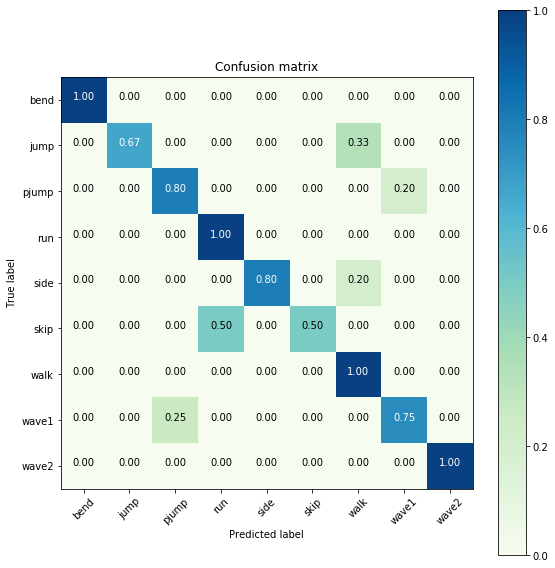

In [51]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=9).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
print y_predictions
print y_test.argmax(axis=1)
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

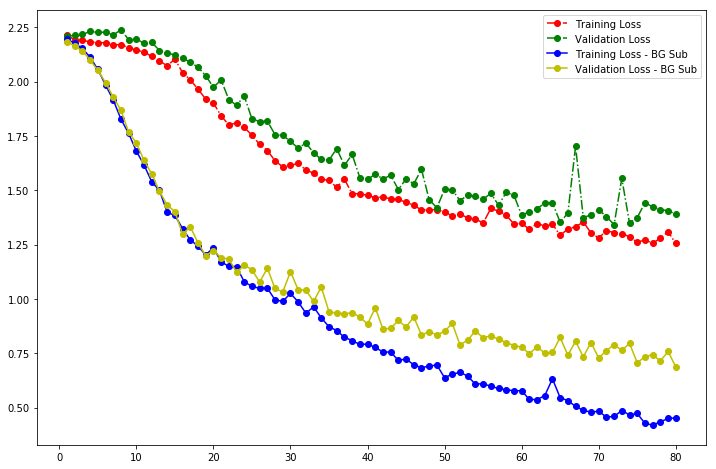

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.legend()

## Model - 2


In [53]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2 = Sequential()


model2.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2.add(GlobalAveragePooling3D())

model2.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2.add(Dense(9, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 3, 9, 9, 16)       1456      
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 3, 5, 5, 16)       0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 1, 3, 3, 64)       0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_5 ( (None, 256)               0         
__________

### Training Model - 2


In [54]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2 = ModelCheckpoint(filepath='W_Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history2 = model2.fit(X_train, y_train, batch_size=15, epochs=80, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint2])

Train on 90 samples, validate on 34 samples
Epoch 1/80
 - 16s - loss: 2.2027 - acc: 0.0556 - val_loss: 2.1968 - val_acc: 0.0588

Epoch 00001: val_loss improved from inf to 2.19681, saving model to W_Model_2.weights.best.hdf5
Epoch 2/80
 - 15s - loss: 2.1964 - acc: 0.1222 - val_loss: 2.1975 - val_acc: 0.0588

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 15s - loss: 2.1953 - acc: 0.1333 - val_loss: 2.1981 - val_acc: 0.0294

Epoch 00003: val_loss did not improve
Epoch 4/80
 - 15s - loss: 2.1928 - acc: 0.1333 - val_loss: 2.2003 - val_acc: 0.0294

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 15s - loss: 2.1887 - acc: 0.1333 - val_loss: 2.2043 - val_acc: 0.0294

Epoch 00005: val_loss did not improve
Epoch 6/80
 - 15s - loss: 2.1822 - acc: 0.1556 - val_loss: 2.1992 - val_acc: 0.0294

Epoch 00006: val_loss did not improve
Epoch 7/80
 - 15s - loss: 2.1763 - acc: 0.1333 - val_loss: 2.1925 - val_acc: 0.0294

Epoch 00007: val_loss improved from 2.19681 to 2.19252, saving model to W_M

 - 15s - loss: 1.0917 - acc: 0.4889 - val_loss: 1.1630 - val_acc: 0.3824

Epoch 00051: val_loss did not improve
Epoch 52/80
 - 15s - loss: 1.0136 - acc: 0.6000 - val_loss: 1.2399 - val_acc: 0.5294

Epoch 00052: val_loss did not improve
Epoch 53/80
 - 15s - loss: 1.0382 - acc: 0.5667 - val_loss: 1.2711 - val_acc: 0.3824

Epoch 00053: val_loss did not improve
Epoch 54/80
 - 15s - loss: 0.9958 - acc: 0.5444 - val_loss: 1.1218 - val_acc: 0.5294

Epoch 00054: val_loss improved from 1.12819 to 1.12182, saving model to W_Model_2.weights.best.hdf5
Epoch 55/80
 - 15s - loss: 0.9904 - acc: 0.6111 - val_loss: 1.1507 - val_acc: 0.4412

Epoch 00055: val_loss did not improve
Epoch 56/80
 - 15s - loss: 0.9809 - acc: 0.5556 - val_loss: 1.1930 - val_acc: 0.5000

Epoch 00056: val_loss did not improve
Epoch 57/80
 - 15s - loss: 0.9729 - acc: 0.5778 - val_loss: 1.2918 - val_acc: 0.4118

Epoch 00057: val_loss did not improve
Epoch 58/80
 - 15s - loss: 0.9393 - acc: 0.5444 - val_loss: 1.1004 - val_acc: 0.44

### Evaluating Model - 2

Evaluating `Model-2` on the test data.

In [55]:
# Loading the model that performed the best on the validation set
model2.load_weights('W_Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss2, accuracy2) = model2.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2 * 100))

Accuracy on test data: 63.33%


## Model - 2 Performance



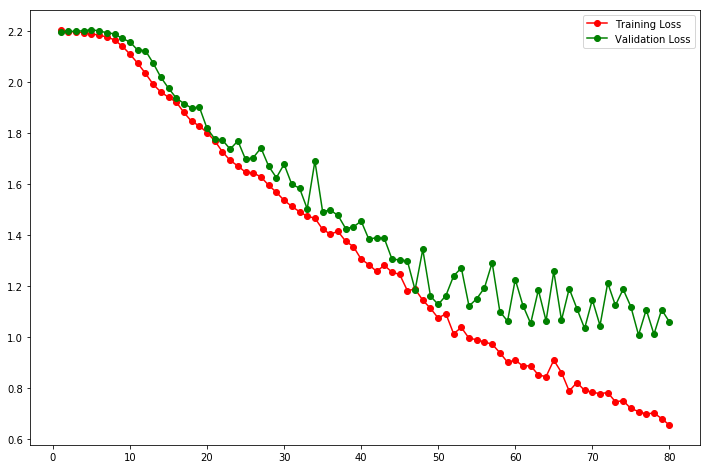

In [56]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2 = history2.history['loss']                          # Loss on the training data
val_loss2 = history2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss')
plt.legend()

Normalized confusion matrix


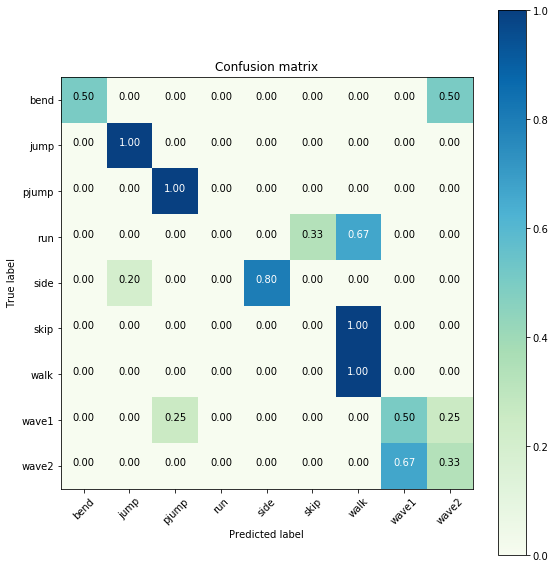

In [57]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2 = model2.predict_classes(X_test);
y_pred2=to_categorical(y_predictions2, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


# Model 2 - With BG

In [58]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2_bg = Sequential()


model2_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2_bg.add(GlobalAveragePooling3D())

model2_bg.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2_bg.add(Dense(9, activation='softmax'))

model2_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 3, 9, 9, 16)       1456      
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 3, 5, 5, 16)       0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 1, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 1, 3, 3, 64)       0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_14 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_6 ( (None, 256)               0         
__________

In [59]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2_bg = ModelCheckpoint(filepath='W_Model_2_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history2_bg = model2_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=2, callbacks=[checkpoint2_bg])

Train on 90 samples, validate on 34 samples
Epoch 1/80
 - 16s - loss: 2.1986 - acc: 0.1333 - val_loss: 2.1881 - val_acc: 0.0588

Epoch 00001: val_loss improved from inf to 2.18814, saving model to W_Model_2_bg.weights.best.hdf5
Epoch 2/80
 - 15s - loss: 2.1727 - acc: 0.1556 - val_loss: 2.1574 - val_acc: 0.0588

Epoch 00002: val_loss improved from 2.18814 to 2.15736, saving model to W_Model_2_bg.weights.best.hdf5
Epoch 3/80
 - 15s - loss: 2.0993 - acc: 0.2000 - val_loss: 2.0852 - val_acc: 0.1176

Epoch 00003: val_loss improved from 2.15736 to 2.08525, saving model to W_Model_2_bg.weights.best.hdf5
Epoch 4/80
 - 15s - loss: 1.9899 - acc: 0.2222 - val_loss: 1.9867 - val_acc: 0.1765

Epoch 00004: val_loss improved from 2.08525 to 1.98665, saving model to W_Model_2_bg.weights.best.hdf5
Epoch 5/80
 - 15s - loss: 1.8550 - acc: 0.2444 - val_loss: 1.8867 - val_acc: 0.1765

Epoch 00005: val_loss improved from 1.98665 to 1.88669, saving model to W_Model_2_bg.weights.best.hdf5
Epoch 6/80
 - 15s - 


Epoch 00057: val_loss did not improve
Epoch 58/80
 - 15s - loss: 0.0510 - acc: 1.0000 - val_loss: 0.9962 - val_acc: 0.8235

Epoch 00058: val_loss did not improve
Epoch 59/80
 - 15s - loss: 0.0758 - acc: 0.9778 - val_loss: 0.9853 - val_acc: 0.8235

Epoch 00059: val_loss did not improve
Epoch 60/80
 - 15s - loss: 0.0752 - acc: 0.9778 - val_loss: 0.9623 - val_acc: 0.8235

Epoch 00060: val_loss did not improve
Epoch 61/80
 - 15s - loss: 0.1060 - acc: 0.9667 - val_loss: 1.0569 - val_acc: 0.8235

Epoch 00061: val_loss did not improve
Epoch 62/80
 - 15s - loss: 0.1519 - acc: 0.9556 - val_loss: 1.0456 - val_acc: 0.8235

Epoch 00062: val_loss did not improve
Epoch 63/80
 - 15s - loss: 0.0641 - acc: 1.0000 - val_loss: 0.8440 - val_acc: 0.8235

Epoch 00063: val_loss did not improve
Epoch 64/80
 - 15s - loss: 0.0485 - acc: 0.9889 - val_loss: 1.0667 - val_acc: 0.8235

Epoch 00064: val_loss did not improve
Epoch 65/80
 - 15s - loss: 0.0522 - acc: 0.9889 - val_loss: 1.0256 - val_acc: 0.8235

Epoch 0

In [60]:
# Loading the model that performed the best on the validation set
model2_bg.load_weights('W_Model_2_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss2_bg, accuracy2_bg) = model2_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2_bg * 100))

Accuracy on test data: 86.67%


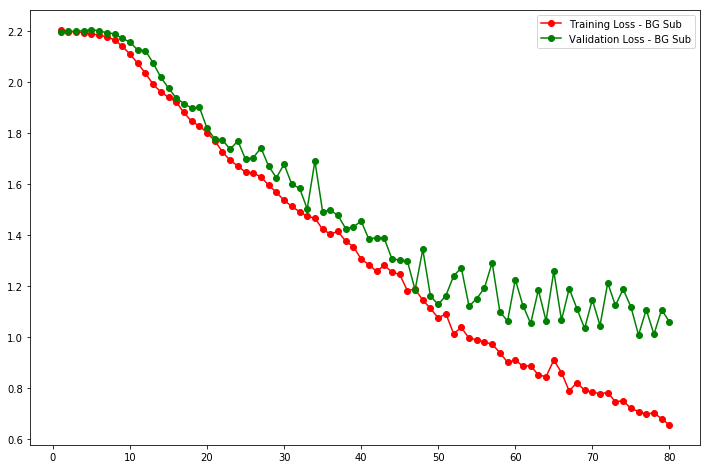

In [61]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2_bg = history2_bg.history['loss']                          # Loss on the training data
val_loss2_bg = history2_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss2, 'ro-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss - BG Sub')
plt.legend()

Normalized confusion matrix


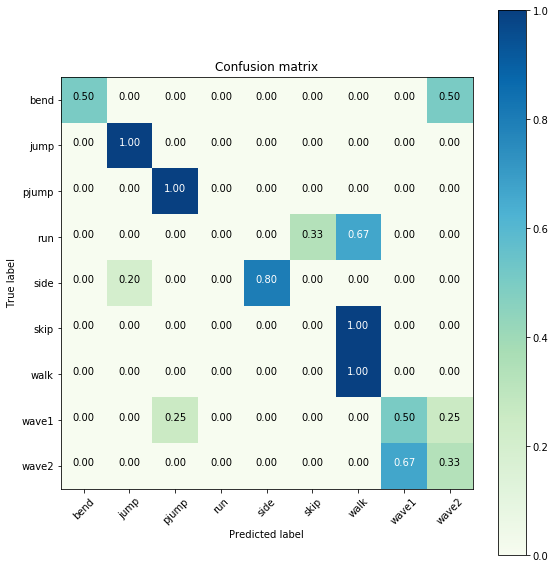

In [62]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2_bg = model2_bg.predict_classes(X_test_bgsub);
y_pred2_bg=to_categorical(y_predictions2, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


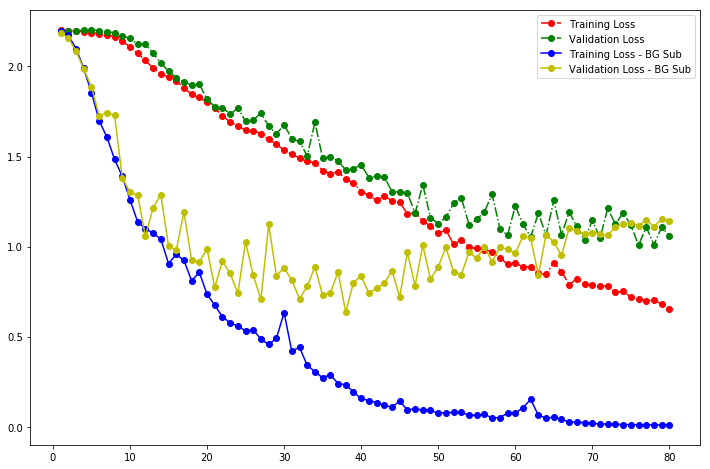

In [63]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss2, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss2_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.legend()

# The model that worked

In [71]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(9, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 20, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 10, 10, 10, 16)    0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 9, 8, 8, 64)       18496     
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 5, 4, 4, 64)       0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 4, 2, 2, 256)      295168    
_________________________________________________________________
max_pooling3d_23 (MaxPooling (None, 2, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_9 ( (None, 256)               0         
__________

In [72]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='W_Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=80, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 90 samples, validate on 34 samples
Epoch 1/80
 - 24s - loss: 2.2415 - acc: 0.1111 - val_loss: 2.1953 - val_acc: 0.1765

Epoch 00001: val_loss improved from inf to 2.19528, saving model to W_Model_3.weights.best.hdf5
Epoch 2/80
 - 22s - loss: 2.2096 - acc: 0.0667 - val_loss: 2.2012 - val_acc: 0.0294

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 23s - loss: 2.1945 - acc: 0.1333 - val_loss: 2.1911 - val_acc: 0.1471

Epoch 00003: val_loss improved from 2.19528 to 2.19112, saving model to W_Model_3.weights.best.hdf5
Epoch 4/80
 - 23s - loss: 2.1933 - acc: 0.1444 - val_loss: 2.2108 - val_acc: 0.0294

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 23s - loss: 2.2058 - acc: 0.1333 - val_loss: 2.1728 - val_acc: 0.0294

Epoch 00005: val_loss improved from 2.19112 to 2.17285, saving model to W_Model_3.weights.best.hdf5
Epoch 6/80
 - 22s - loss: 2.1410 - acc: 0.1444 - val_loss: 2.1435 - val_acc: 0.0294

Epoch 00006: val_loss improved from 2.17285 to 2.14349, saving model to W_


Epoch 00052: val_loss did not improve
Epoch 53/80
 - 12s - loss: 1.2690 - acc: 0.4333 - val_loss: 0.9544 - val_acc: 0.6176

Epoch 00053: val_loss did not improve
Epoch 54/80
 - 12s - loss: 1.3348 - acc: 0.4000 - val_loss: 1.1144 - val_acc: 0.5294

Epoch 00054: val_loss did not improve
Epoch 55/80
 - 12s - loss: 1.3006 - acc: 0.3778 - val_loss: 1.1089 - val_acc: 0.5294

Epoch 00055: val_loss did not improve
Epoch 56/80
 - 12s - loss: 1.2631 - acc: 0.3889 - val_loss: 0.9984 - val_acc: 0.6176

Epoch 00056: val_loss did not improve
Epoch 57/80
 - 12s - loss: 1.1566 - acc: 0.3889 - val_loss: 0.9628 - val_acc: 0.6471

Epoch 00057: val_loss did not improve
Epoch 58/80
 - 12s - loss: 1.2452 - acc: 0.4111 - val_loss: 1.1373 - val_acc: 0.6471

Epoch 00058: val_loss did not improve
Epoch 59/80
 - 12s - loss: 1.2456 - acc: 0.5111 - val_loss: 1.9960 - val_acc: 0.4118

Epoch 00059: val_loss did not improve
Epoch 60/80
 - 12s - loss: 1.7261 - acc: 0.4333 - val_loss: 1.0953 - val_acc: 0.5588

Epoch 0

In [73]:
# Loading the model that performed the best on the validation set
model3.load_weights('W_Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 63.33%


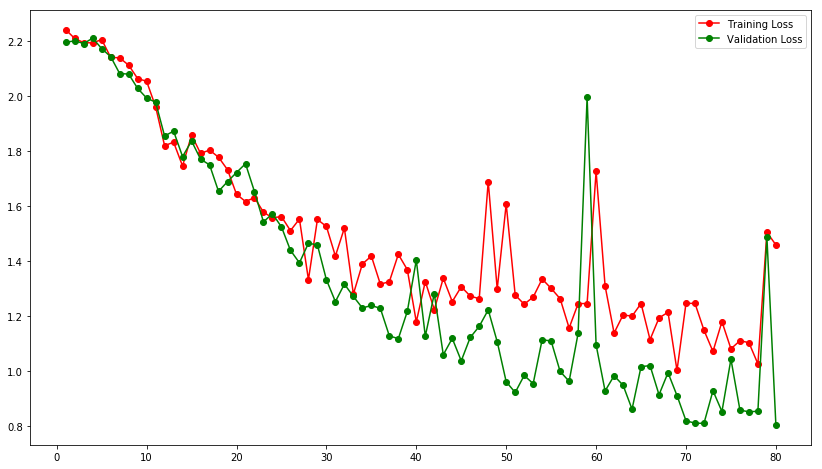

In [74]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.legend()

Normalized confusion matrix


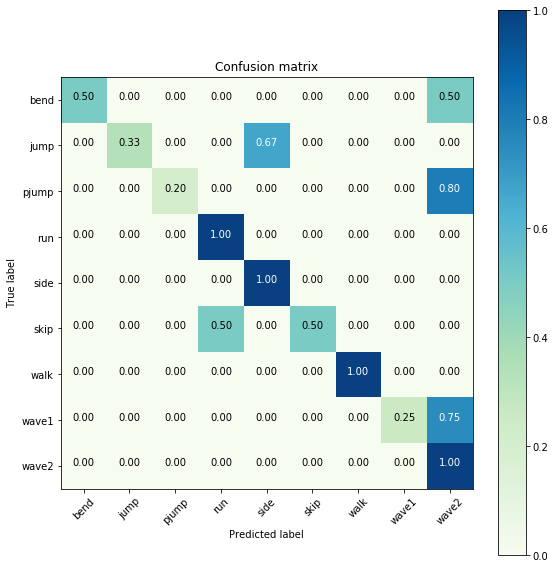

In [75]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


## Model3 BG Subtraction

In [91]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())

# Hidden layer
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(9, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_30 (Conv3D)           (None, 20, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_30 (MaxPooling (None, 10, 10, 10, 16)    0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 9, 8, 8, 64)       18496     
_________________________________________________________________
max_pooling3d_31 (MaxPooling (None, 5, 4, 4, 64)       0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 4, 2, 2, 256)      295168    
_________________________________________________________________
max_pooling3d_32 (MaxPooling (None, 2, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_12  (None, 256)               0         
__________

In [92]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='W_Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 90 samples, validate on 34 samples
Epoch 1/80
90/90 [==============================] - 12s 139ms/step - loss: 2.1907 - acc: 0.1000 - val_loss: 2.1378 - val_acc: 0.2059

Epoch 00001: val_loss improved from inf to 2.13779, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 2/80
90/90 [==============================] - 12s 129ms/step - loss: 2.0571 - acc: 0.1778 - val_loss: 2.0725 - val_acc: 0.3235

Epoch 00002: val_loss improved from 2.13779 to 2.07251, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 3/80
90/90 [==============================] - 12s 134ms/step - loss: 2.0428 - acc: 0.2444 - val_loss: 1.9252 - val_acc: 0.3529

Epoch 00003: val_loss improved from 2.07251 to 1.92516, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 4/80
90/90 [==============================] - 12s 132ms/step - loss: 1.8907 - acc: 0.3000 - val_loss: 1.8830 - val_acc: 0.2941

Epoch 00004: val_loss improved from 1.92516 to 1.88296, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 5/80
9

In [93]:
# Loading the model that performed the best on the validation set
model3.load_weights('W_Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 93.33%


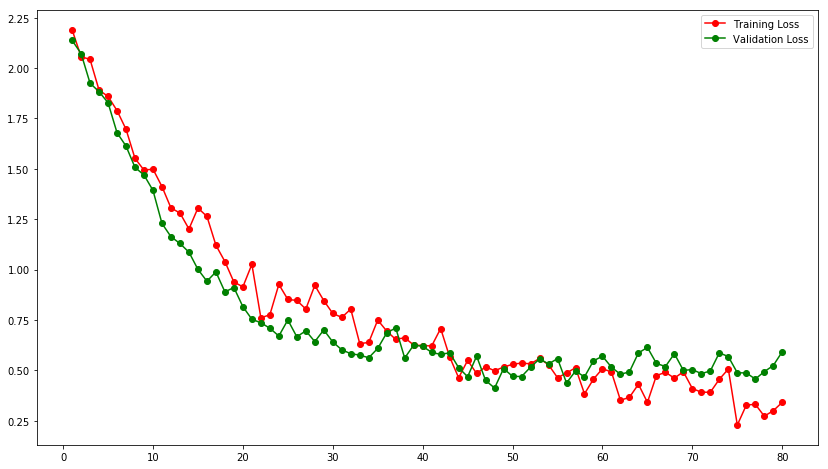

In [94]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.legend()

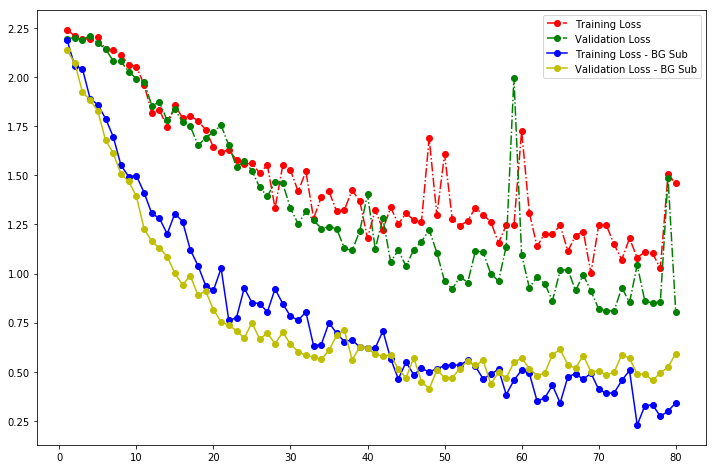

In [95]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.legend()

[5 3 4 5 4 6 6 0 2 7 8 2 8 3 0 2 6 7 2 4 1 1 4 4 2 2 3 6 8 7]
[5 3 4 5 4 6 6 0 2 7 8 2 8 3 0 2 1 7 2 4 1 1 4 4 7 2 3 6 8 7]
Normalized confusion matrix


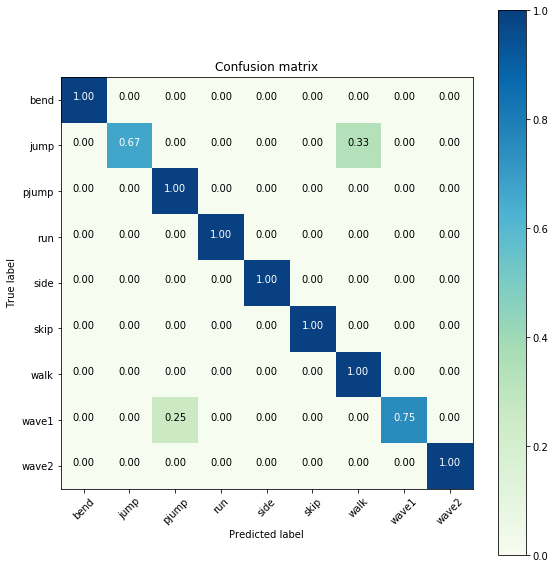

In [96]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
print y_predictions3_bg
print y_test.argmax(axis=1)
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


# Ignore the below models